<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220701.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* regression

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg 
from plotnine import ggplot, aes 
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer 
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# regression

In [8]:
raw = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv')
raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
raw['date'] = pd.to_datetime(raw['date'])
raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
x = raw[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = raw['price']
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
x = x.assign(yr_built = 2022 - x['yr_built'],
         yr_renovated = 2022 - x['yr_renovated'])
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,67,2022,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,71,31,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,89,2022,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,57,2022,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,35,2022,98074,47.6168,-122.045,1800,7503


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


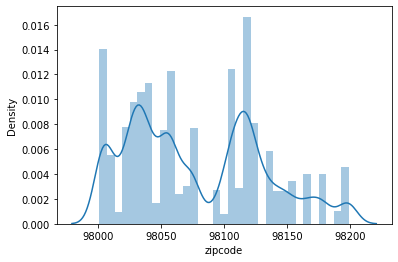

In [22]:
sns.distplot(x['zipcode'])

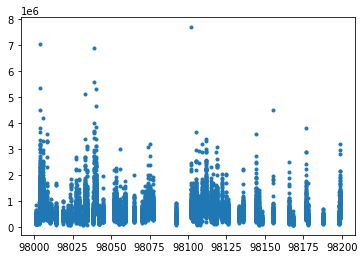

In [29]:
plt.plot(x['zipcode'], y.values, '.')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


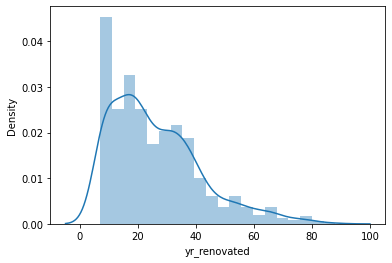

In [31]:
sns.distplot(x['yr_renovated'][x['yr_renovated'] <= 1999])

In [33]:
x = x.assign(yr_renovated = np.select([x['yr_renovated']>=1500, x['yr_renovated'] >= 10, x['yr_renovated'] >= 0],
                                  ['no', 'old', 'new']) )
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,67,no,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,71,old,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,89,no,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,57,no,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,35,no,98074,47.6168,-122.045,1800,7503


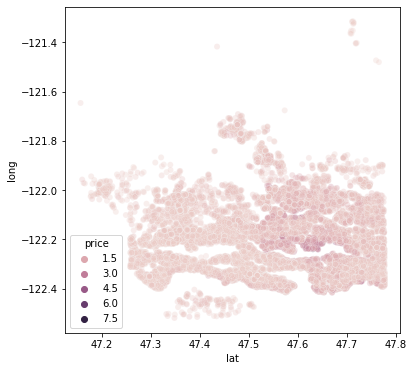

In [46]:
plt.figure(figsize = [6,6])
sns.scatterplot(data = pd.concat([x, pd.DataFrame(y, columns = ['price'])], axis = 1), 
                x = 'lat', y = 'long', hue = 'price', alpha = .3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


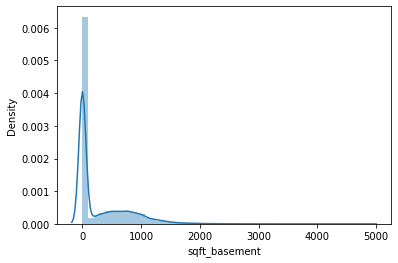

In [49]:
sns.distplot(x['sqft_basement'])

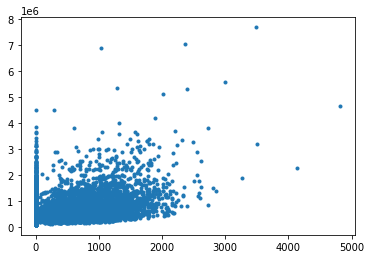

In [51]:
plt.plot(x['sqft_basement'], y.values, '.')

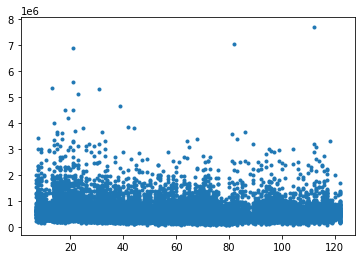

In [53]:
plt.plot(x['yr_built'], y.values, '.')

In [47]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,67,no,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,71,old,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,89,no,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,57,no,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,35,no,98074,47.6168,-122.045,1800,7503


In [65]:
x_ = pd.get_dummies(x, columns = ['waterfront', 'grade','view', 'condition', 'yr_renovated'])
x_.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,...,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,yr_renovated_new,yr_renovated_no,yr_renovated_old
0,3,1.00,1180,5650,1.0,1180,0,67,98178,47.5112,...,0,0,0,0,1,0,0,0,1,0
1,3,2.25,2570,7242,2.0,2170,400,71,98125,47.7210,...,0,0,0,0,1,0,0,0,0,1
2,2,1.00,770,10000,1.0,770,0,89,98028,47.7379,...,0,0,0,0,1,0,0,0,1,0
3,4,3.00,1960,5000,1.0,1050,910,57,98136,47.5208,...,0,0,0,0,0,0,1,0,1,0
4,3,2.00,1680,8080,1.0,1680,0,35,98074,47.6168,...,0,0,0,0,1,0,0,0,1,0


In [66]:
x_.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_0', 'waterfront_1',
       'grade_1', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13',
       'view_0', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_1',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'yr_renovated_new', 'yr_renovated_no', 'yr_renovated_old'],
      dtype='object')

In [70]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x_[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long']])
x_std = pd.DataFrame(x_std, columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long'])
x_std.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.734708,-0.658681,0.544898,-0.352572,-0.306079
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,0.460841,0.245141,0.681079,1.161568,-0.746341
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-1.229834,-0.658681,1.293892,1.283537,-0.135655
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.891699,1.397515,0.204446,-0.283288,-1.271816
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.130895,-0.658681,-0.544548,0.409550,1.199335


In [71]:
x_dummies = x_[['waterfront_0', 'waterfront_1', 'view_0',
       'view_1', 'view_2', 'view_3', 'view_4', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'yr_renovated_new',
       'yr_renovated_no', 'yr_renovated_old']]
x_dummies.head()

,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,yr_renovated_new,yr_renovated_no,yr_renovated_old
0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [73]:
x_std = pd.concat([x_std, x_dummies], axis = 1)
x_std.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,yr_renovated_new,yr_renovated_no,yr_renovated_old
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.734708,-0.658681,0.544898,-0.352572,-0.306079,...,0,0,0,0,1,0,0,0,1,0
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,0.460841,0.245141,0.681079,1.161568,-0.746341,...,0,0,0,0,1,0,0,0,0,1
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-1.229834,-0.658681,1.293892,1.283537,-0.135655,...,0,0,0,0,1,0,0,0,1,0
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.891699,1.397515,0.204446,-0.283288,-1.271816,...,0,0,0,0,0,0,1,0,1,0
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.130895,-0.658681,-0.544548,0.409550,1.199335,...,0,0,0,0,1,0,0,0,1,0


In [74]:
res = [KMeans(n_clusters = a).fit(x_std).inertia_ for a in range(1, 11)]

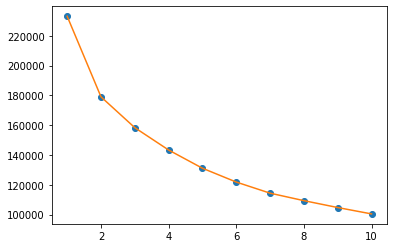

In [75]:
plt.plot(range(1, 11), res, 'o')
plt.plot(range(1, 11), res)

In [76]:
fit_km = KMeans(n_clusters = 6).fit(x_std)

In [81]:
res_km = pd.DataFrame(np.c_[x['zipcode'], fit_km.labels_.reshape(-1, 1)], columns = ['zipcode', 'cl'])
res_km['cl'] = res_km['cl'].astype(str)
res_km.head()

,zipcode,cl
0,98178,4
1,98125,2
2,98028,4
3,98136,3
4,98074,0


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


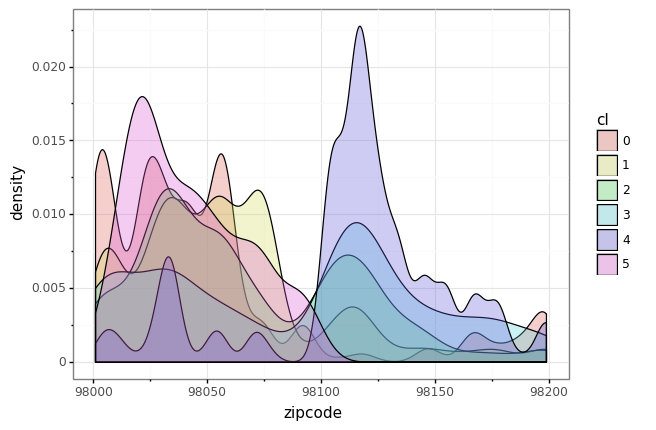

<ggplot: (8773567221589)>

In [82]:
(
    ggplot(res_km.assign(), aes('zipcode', fill = 'cl')) +
    gg.geom_density(alpha = .3) +
    gg.theme_bw()
)

In [92]:
x_1 = x_.drop(columns = ['zipcode'], axis = 1)
x_2 = x_.copy()
x_2 = x_2.assign(zipcode = fit_km.labels_.astype(str))
x_2 = pd.get_dummies(x_2, columns = ['zipcode'])
x_2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,condition_5,yr_renovated_new,yr_renovated_no,yr_renovated_old,zipcode_0,zipcode_1,zipcode_2,zipcode_3,zipcode_4,zipcode_5
0,3,1.00,1180,5650,1.0,1180,0,67,47.5112,-122.257,...,0,0,1,0,0,0,0,0,1,0
1,3,2.25,2570,7242,2.0,2170,400,71,47.7210,-122.319,...,0,0,0,1,0,0,1,0,0,0
2,2,1.00,770,10000,1.0,770,0,89,47.7379,-122.233,...,0,0,1,0,0,0,0,0,1,0
3,4,3.00,1960,5000,1.0,1050,910,57,47.5208,-122.393,...,1,0,1,0,0,0,0,1,0,0
4,3,2.00,1680,8080,1.0,1680,0,35,47.6168,-122.045,...,0,0,1,0,1,0,0,0,0,0


In [93]:
x_tr1, x_te1, y_tr1, y_te1 = train_test_split(x_1, y, train_size = .7)
x_tr2, x_te2, y_tr2, y_te2 = train_test_split(x_2, y, train_size = .7)

In [108]:
fit_lm1 = LinearRegression().fit(x_tr1, y_tr1)
fit_lm2 = LinearRegression().fit(x_tr2, y_tr2)
fit_rf1 = RandomForestRegressor().fit(x_tr1, y_tr1)
fit_rf2 = RandomForestRegressor().fit(x_tr2, y_tr2)

In [109]:
pred_lm1 = fit_lm1.predict(x_te1)
pred_lm2 = fit_lm2.predict(x_te2)
pred_rf1 = fit_rf1.predict(x_te1)
pred_rf2 = fit_rf2.predict(x_te2)

In [132]:
rmse = [mean_squared_error(y_te1, pred_lm1), mean_squared_error(y_te1, pred_lm1), mean_squared_error(y_te2, pred_rf1), mean_squared_error(y_te2, pred_rf2)]
rmse

[38267107481.69142, 38267107481.69142, 249542563995.97333, 16138534022.12929]

In [133]:
rmse = pd.DataFrame(np.c_[['lm1', 'lm2', 'rf1', 'rf2'], rmse],columns = ['model', 'rmse'])
rmse['rmse'] = rmse['rmse'].astype(float)
rmse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   4 non-null      object 
 1   rmse    4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


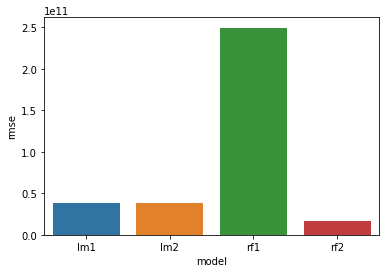

In [134]:
sns.barplot(data = rmse, x = 'model', y = 'rmse')

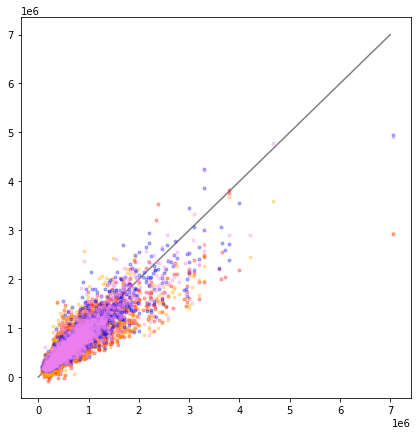

In [145]:
plt.figure(figsize = [7,7])
plt.plot([0,7000000], [0,7000000], color = 'gray')
plt.plot(y_te1, pred_lm1, '.', color = 'red', alpha = .3)
plt.plot(y_te2, pred_lm2, '.', color = 'orange', alpha = .3)
plt.plot(y_te1, pred_rf1, '.', color = 'blue', alpha = .3)
plt.plot(y_te2, pred_rf2, '.', color = 'violet', alpha = .3)